# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Carregar a base tratada
df_tratada = pd.read_csv("base_tratada.csv")

# Carregar a base original para recuperar a variável resposta
df_original = pd.read_csv("base_final.csv")

# Adicionar a variável 'default' renomeando para 'resposta_mau'
df_tratada["resposta_mau"] = df_original["default"].astype(int)  # Converte para 0 e 1

# Salvar a base corrigida
df_tratada.to_csv("base_tratada_corrigida.csv", index=False)

# Carregar a base corrigida
df = pd.read_csv("base_tratada_corrigida.csv")

# Garantir que não há variáveis string
print("Tipos de dados:\n", df.dtypes)

# Garantir que não há valores nulos
print("\nValores ausentes:\n", df.isnull().sum().sum())

# Remover possíveis valores nulos (caso ainda existam)
df = df.dropna()

# Separar variáveis explicativas (X) e variável resposta (y)
X = df.drop(columns=["resposta_mau"])  # Exclui a variável alvo
y = df["resposta_mau"]  # Variável alvo (já numérica)

# Dividir em 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Exibir tamanho dos conjuntos
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tipos de dados:
 ID                                                     int64
CNT_CHILDREN                                           int64
AMT_INCOME_TOTAL                                     float64
DAYS_BIRTH                                             int64
DAYS_EMPLOYED                                          int64
FLAG_MOBIL                                             int64
FLAG_WORK_PHONE                                        int64
FLAG_PHONE                                             int64
FLAG_EMAIL                                             int64
CNT_FAM_MEMBERS                                      float64
CODE_GENDER_M                                           bool
FLAG_OWN_CAR_Y                                          bool
FLAG_OWN_REALTY_Y                                       bool
NAME_INCOME_TYPE_Pensioner                              bool
NAME_INCOME_TYPE_State servant                          bool
NAME_INCOME_TYPE_Student                                bool
NAME_IN

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

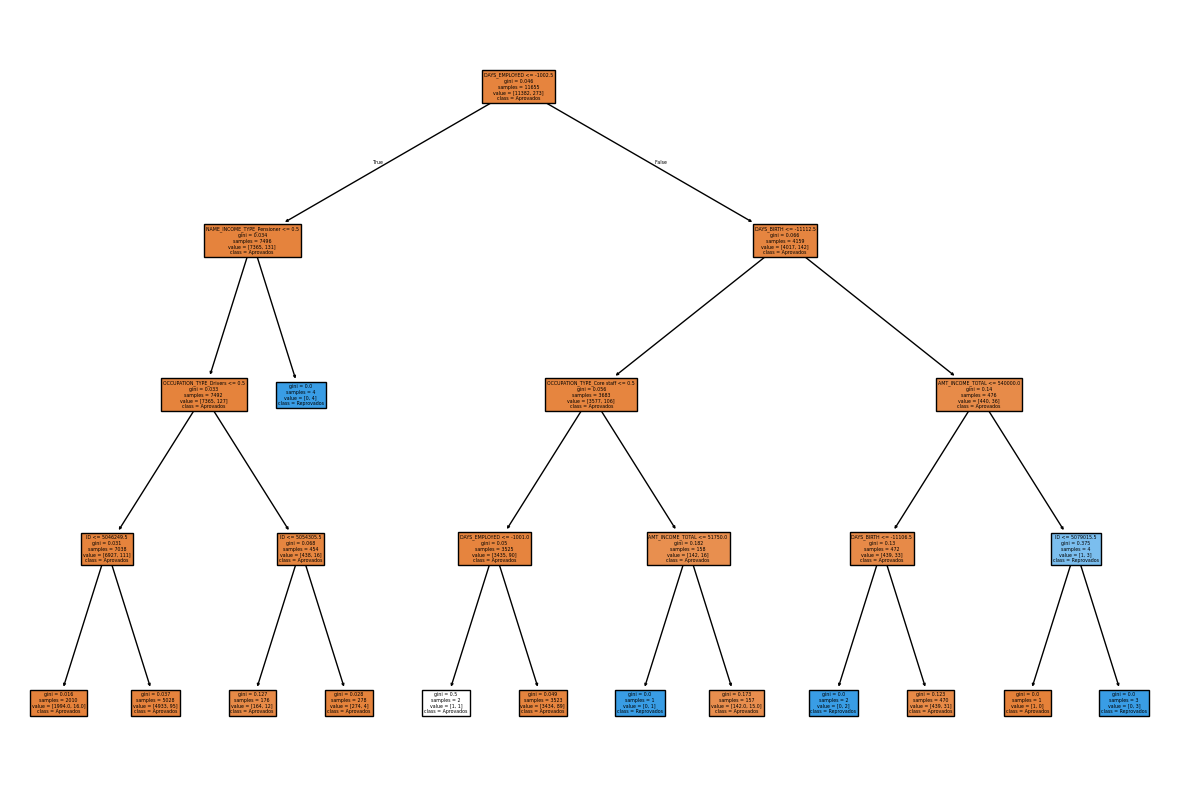

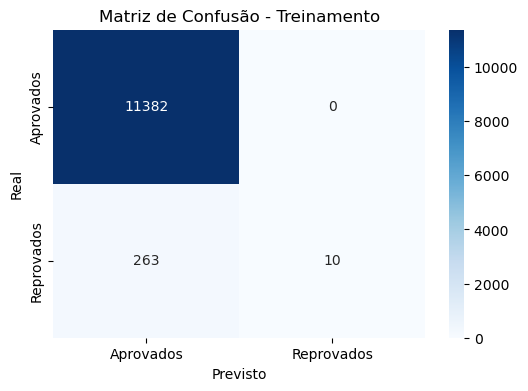

Acurácia no conjunto de treino: 0.9774


In [18]:
# Criar e treinar a árvore de decisão
modelo_arvore = DecisionTreeClassifier(random_state=42, max_depth=4)
modelo_arvore.fit(X_train, y_train)

# Visualizar a árvore de decisão
plt.figure(figsize=(15, 10))
plot_tree(modelo_arvore, feature_names=X.columns, class_names=["Aprovados", "Reprovados"], filled=True)
plt.show()

# Fazer previsões no conjunto de treino
y_train_pred = modelo_arvore.predict(X_train)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Exibir a matriz de confusão com rótulos
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Aprovados", "Reprovados"], yticklabels=["Aprovados", "Reprovados"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Treinamento")
plt.show()

# Calcular a acurácia no conjunto de treino
acuracia_treino = accuracy_score(y_train, y_train_pred)
print(f"Acurácia no conjunto de treino: {acuracia_treino:.4f}")

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

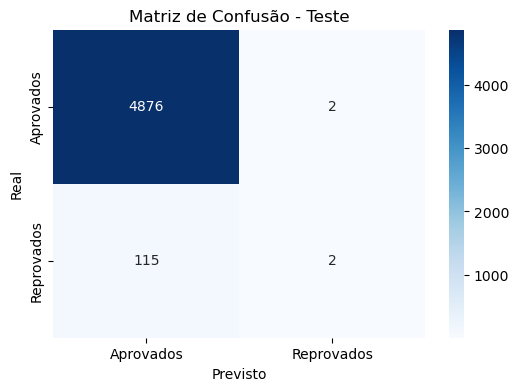

Acurácia na base de teste: 0.9766
Acurácia na base de treino: 0.9774


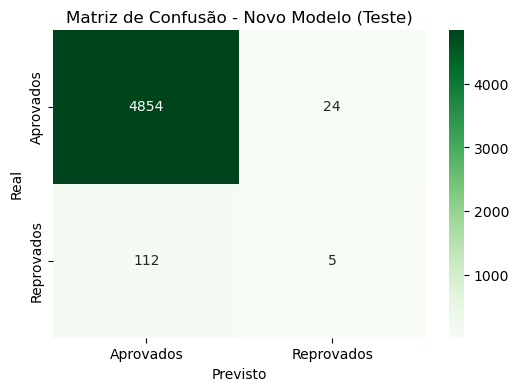

Proporção de proponentes classificados como 'maus': 0.5806%
Acurácia se classificarmos todos como 'bons': 0.9766


In [19]:
# Fazer previsões no conjunto de teste
y_test_pred = modelo_arvore.predict(X_test)

# Calcular a matriz de confusão para a base de teste
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Exibir a matriz de confusão da base de teste
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Aprovados", "Reprovados"], yticklabels=["Aprovados", "Reprovados"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Teste")
plt.show()

# Calcular a acurácia na base de teste
acuracia_teste = accuracy_score(y_test, y_test_pred)
print(f"Acurácia na base de teste: {acuracia_teste:.4f}")
print(f"Acurácia na base de treino: {acuracia_treino:.4f}")

# Treinar uma nova árvore com max_depth=10 e min_samples_leaf=5
modelo_arvore_novo = DecisionTreeClassifier(random_state=123, max_depth=10, min_samples_leaf=5)
modelo_arvore_novo.fit(X_train, y_train)

# Fazer previsões na base de teste com o novo modelo
y_test_pred_novo = modelo_arvore_novo.predict(X_test)

# Matriz de confusão para o novo modelo
conf_matrix_test_novo = confusion_matrix(y_test, y_test_pred_novo)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test_novo, annot=True, fmt="d", cmap="Greens", xticklabels=["Aprovados", "Reprovados"], yticklabels=["Aprovados", "Reprovados"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Novo Modelo (Teste)")
plt.show()

# Proporção de "maus" classificados
prop_maus = y_test_pred_novo.sum() / len(y_test_pred_novo)
print(f"Proporção de proponentes classificados como 'maus': {prop_maus:.4%}")

# Acurácia se classificarmos todos como 'bons'
acuracia_todos_bons = (y_test == 0).sum() / len(y_test)
print(f"Acurácia se classificarmos todos como 'bons': {acuracia_todos_bons:.4f}")